<a href="https://colab.research.google.com/github/Andreagazy/PCVK-2024/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TUGAS PRAKTIKUM
### 1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.


In [2]:

from google.colab import drive
drive.mount('/content/drive')
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import glob
import math

Mounted at /content/drive


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


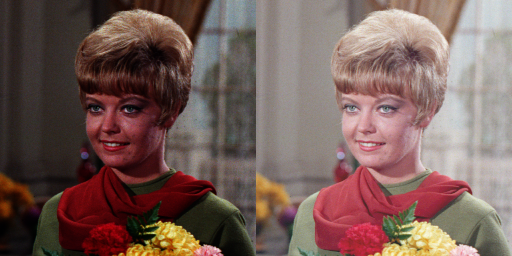

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
if original is None:
    print("Gambar tidak ditemukan!")
    exit()


def gamma_correction(image, gamma):
    # Membuat lookup table untuk setiap nilai pixel
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Mengaplikasikan lookup table ke gambar
    return cv.LUT(image, table)

corrected_image = gamma_correction(original, gamma)

final_frame = cv.hconcat([original, corrected_image])
cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. <br><br>
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra, silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh pada Gambar.

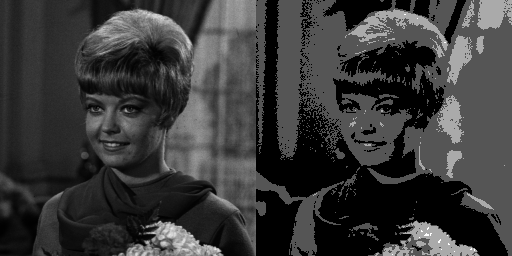

In [4]:

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = round(original[y, x] / level) * level

final_frame = cv.hconcat([original, depth_image])
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. <br>
Citra asli sudah disediakan pada /images/galaxy.jpg. <br>
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob `(import glob)`.


Jumlah Citra: 5, PSNR: 27.5393469527811 dB


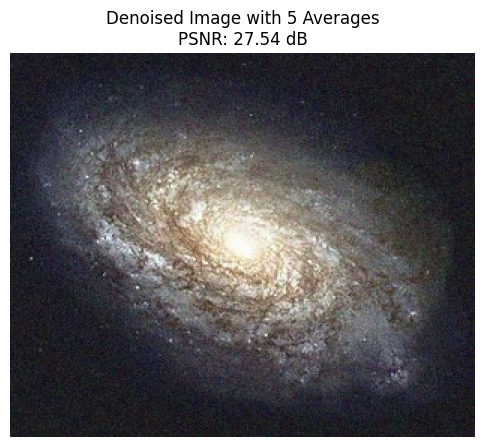

Jumlah Citra: 10, PSNR: 27.551955254340584 dB


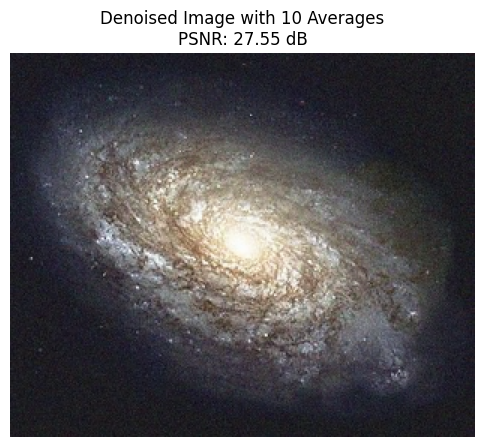

Jumlah Citra: 20, PSNR: 27.510569740978575 dB


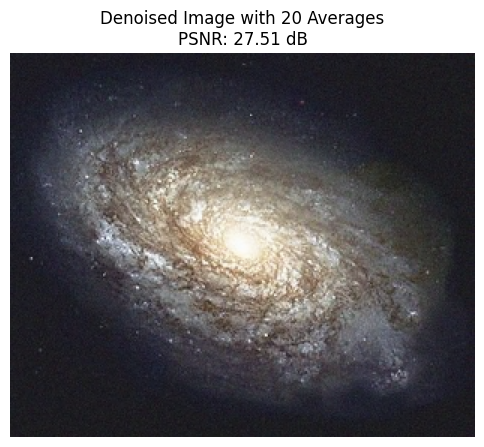

Jumlah Citra: 40, PSNR: 27.45589949020644 dB


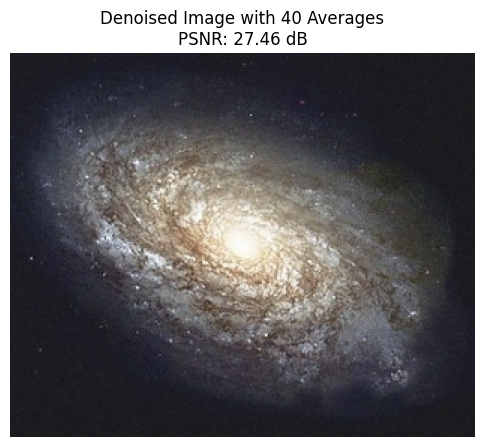

Jumlah Citra: 80, PSNR: 27.397826469219794 dB


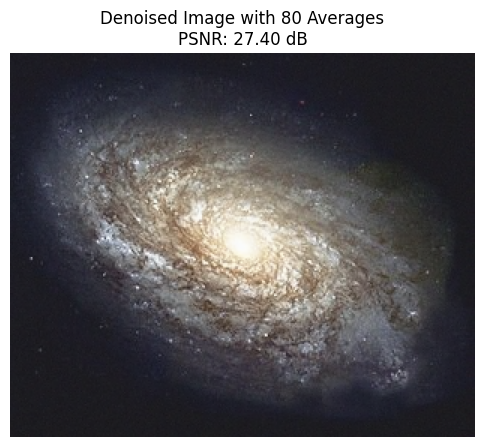

Jumlah Citra: 100, PSNR: 27.370931279516654 dB


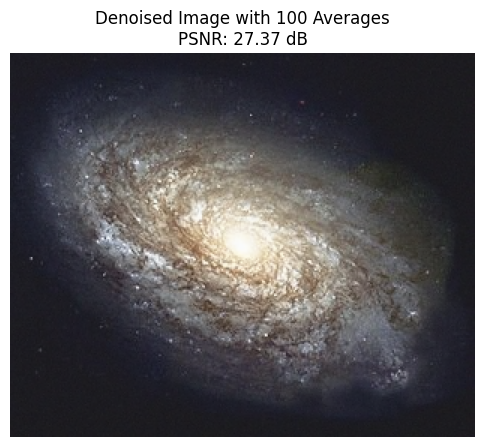

In [6]:

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE of 0 means no noise, PSNR is infinite
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
    return psnr

# Read the original image
original_image = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

# Initialize a list to store noisy images
cv_img = []

# Read all noisy images from the folder
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Get dimensions of the first noisy image
height, width, channels = cv_img[0].shape

# List of counts for averaging
image_counts = [5, 10, 20, 40, 80, 100]  # Specific image counts for averaging

# Loop through each specified count
for count in image_counts:
    # Initialize sum_images with zeros for each averaging case
    sum_images = np.zeros((height, width, channels), np.float32)

    # Average the first 'count' noisy images
    for i in range(count):
        sum_images += cv_img[i]

    # Calculate the average image
    average_image = sum_images / count
    average_image = np.uint8(average_image)  # Convert back to uint8 for saving

    # Calculate PSNR between the original and denoised image
    psnr_value = PSNR(original_image, average_image)
    print(f'Jumlah Citra: {count}, PSNR: {psnr_value} dB')

    # Display the denoised image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv.cvtColor(average_image, cv.COLOR_BGR2RGB))
    plt.title(f'Denoised Image with {count} Averages\nPSNR: {psnr_value:.2f} dB')
    plt.axis('off')
    plt.show()

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

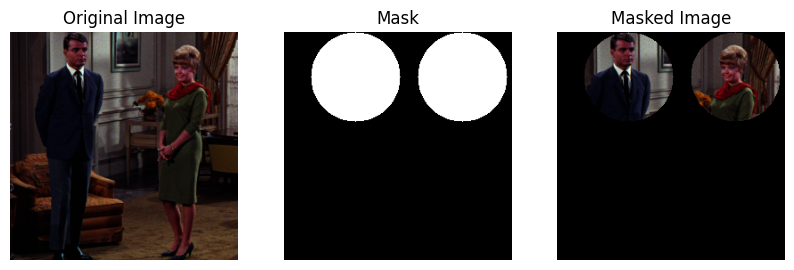

In [24]:
image = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff')

mask = np.zeros(image.shape, dtype=np.uint8)
circle_1 = cv.circle(mask, (80, 50), 50, (255, 255, 255), thickness=cv.FILLED )
circle_2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), thickness=cv.FILLED)

masked_image = cv.bitwise_and(image, mask)

plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

# Masked image
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_image, cv.COLOR_BGR2RGB))
plt.title('Masked Image')
plt.axis('off')

plt.show()


5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

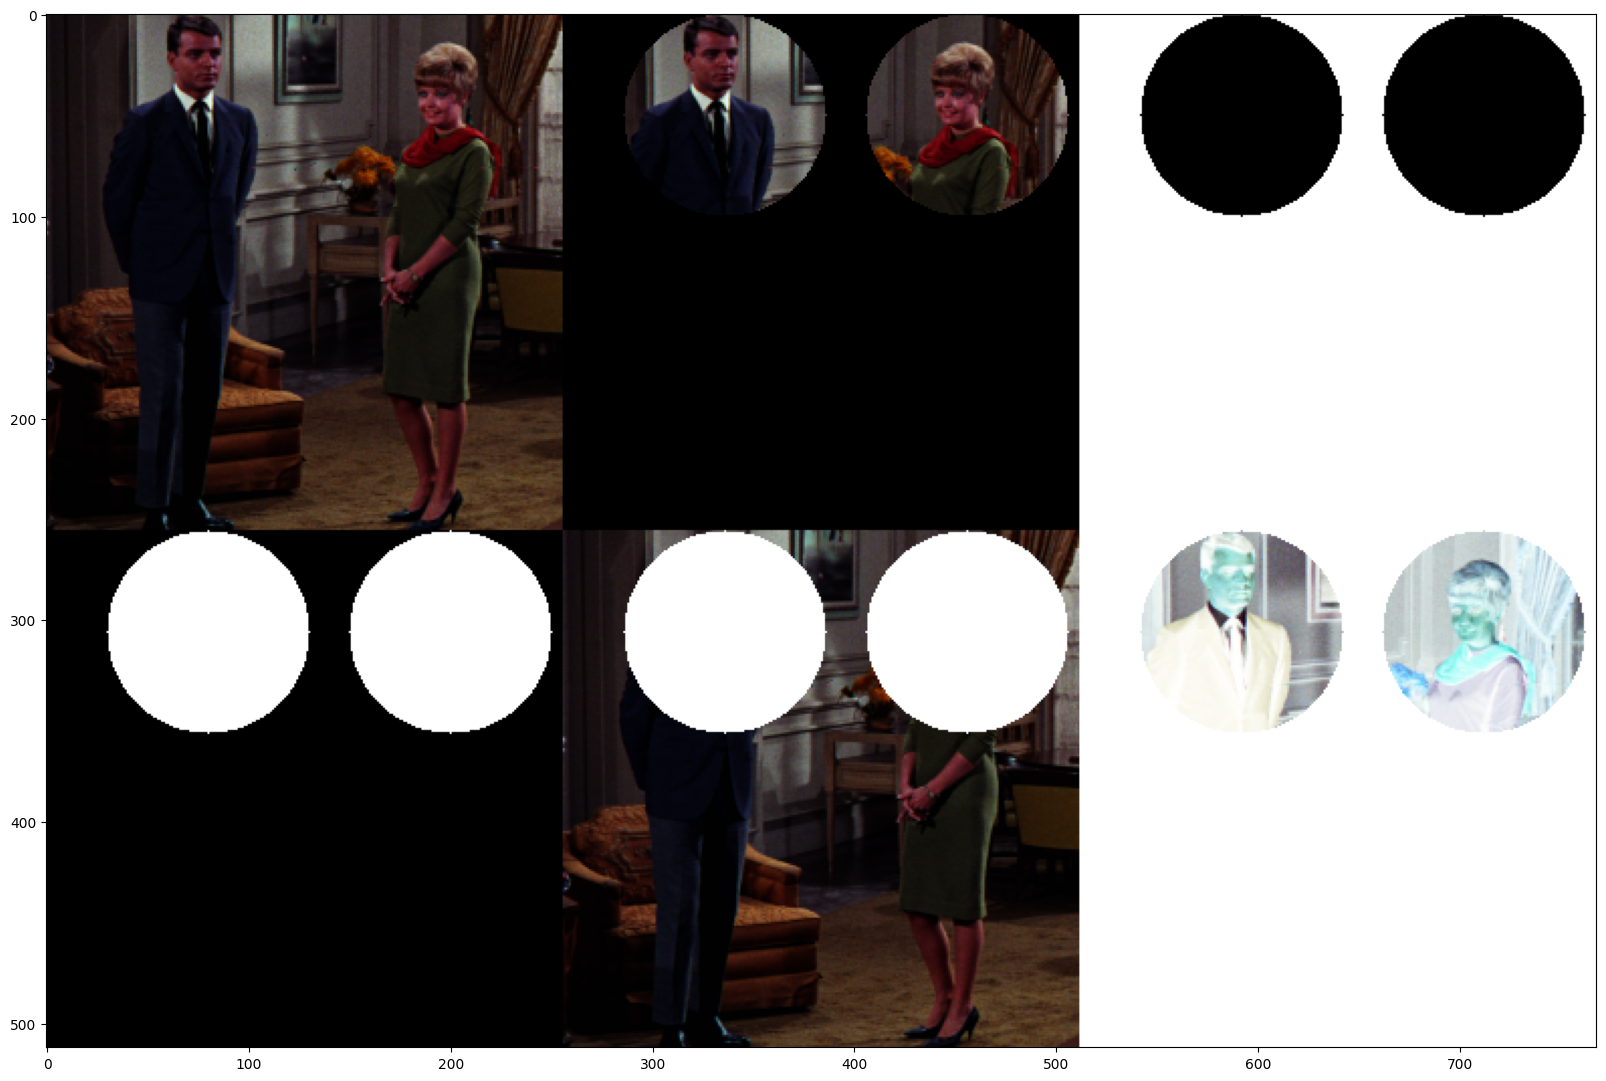

In [67]:
# Create a mask with two circles
mask = np.zeros(image.shape, dtype=np.uint8)
circle_1 = cv.circle(mask, (80, 50), 50, (255, 255, 255), thickness=cv.FILLED )
circle_2 = cv.circle(mask, (200, 50), 50, (255, 255, 255), thickness=cv.FILLED)

# Apply different bitwise operations
bitwise_and = cv.bitwise_and(image, mask)
bitwise_or = cv.bitwise_or(image, mask)
bitwise_not = cv.bitwise_not(mask)
bitwise_nand = cv.bitwise_not(bitwise_and)
bitwise_xor = cv.bitwise_xor(image, mask)

# Define a list of operators, inputs, and outputs
operations = [
    ('Original Image', image),
    ('Bitwise AND', bitwise_and),
    ('Bitwise OR', bitwise_or),
    ('Bitwise NOT', bitwise_not),
    ('Bitwise NAND (Masih Salah)', bitwise_nand),
    ('Bitwise XOR', bitwise_xor),
]

def resize_images_to_same_shape(*images):
    shapes = [img.shape[:2] for img in images]
    max_shape = np.max(shapes, axis=0)
    resized_images = [cv.resize(img, (max_shape[1], max_shape[0])) for img in images]
    return resized_images

resized_images = resize_images_to_same_shape(
    image , mask, bitwise_and, bitwise_or, bitwise_not, bitwise_nand, bitwise_xor
)

final_frame = np.hstack([
    np.vstack([resized_images[0], resized_images[1]]),
    np.vstack([resized_images[2], resized_images[3]]),
    np.vstack([resized_images[4], resized_images[5]])
])

plt.figure(figsize=(20, 15))
plt.imshow(cv.cvtColor(final_frame, cv.COLOR_BGR2RGB))
plt.show()
